In [1]:
# Code to load DataPCA.csv into the notebook
from google.colab import files
uploaded = files.upload()   

Saving DataKPCA.csv to DataKPCA (1).csv


In [2]:
# Converting uploaded file to pandas dataframe
import pandas as pd                 # Data handling library
import io                           # To convert class type to bytes
data_df = pd.read_csv(io.BytesIO(uploaded['DataKPCA.csv']))

In [3]:
# Code for data visualization (Different types of visualization performed)
import numpy as np                  # For linear algebra
import matplotlib.pyplot as plt     # To display plots
import seaborn as sns               # Also a plotting tool package
import sklearn                      # Machine learning library

# Simply printing the head values of the data
display(data_df.head())

# Storing number of data points and features
dim = data_df.shape
n_points = dim[0]
n_features = dim[1]
print(dim)

,x1,x2,x3,x4,x5,x6,x7
0,2.596641,15.263178,-46.289607,-10.993265,-2.266729,1.935832,2.039688
1,3.096286,14.784802,-48.175614,-8.799362,-2.220871,1.851201,1.921974
2,3.360246,14.774917,-49.471841,-9.030501,-1.760447,1.753114,2.041933
3,2.214819,15.027394,-43.200400,-13.565001,-2.643018,2.200463,2.141847
4,3.398576,15.115756,-49.416644,-6.857672,-2.025936,1.788085,1.875540


(190, 7)


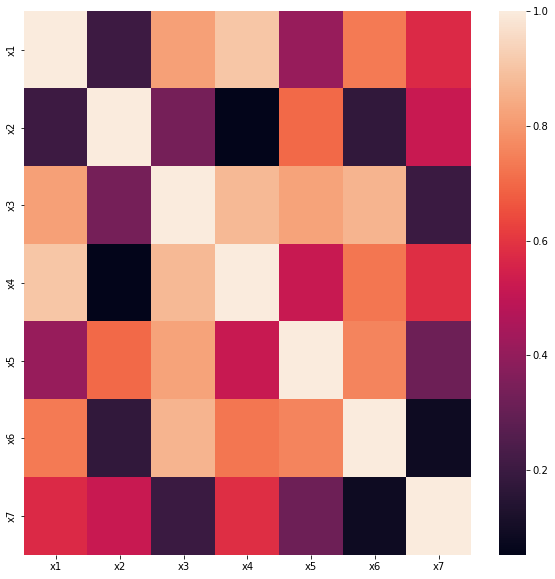

In [4]:
# To visualize correlation of the data
corrMatrix = data_df.corr(method='spearman')
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(abs(corrMatrix), annot=False)
plt.show()

In [5]:
# Training KPCA on the given data
from scipy.spatial.distance import pdist, squareform    # Libraries needed for KPCA
from scipy import exp
from scipy.linalg import eigh

data_arr = np.array(data_df)
# REF: https://odsc.medium.com/implementing-a-kernel-principal-component-analysis-in-python-495f04a7f85f
def KPCA(gamma):
    dist_squared = squareform(pdist(data_arr, 'sqeuclidean'))   # Pairwise Euclidean Distance Squared, as a Matrix
    K = exp(-gamma*dist_squared)                                # Symmetric Kernel Matrix
    # Now we centre the Kernel Matrix
    averager = np.ones((n_points, n_points))/n_points
    K = K - averager.dot(K) - K.dot(averager) + averager.dot(K).dot(averager)
    # Extracting Eigen Values and Vectors
    e_vals, e_vecs = eigh(K)
    e_vals = e_vals[::-1]
    return e_vals

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Variance Explained')

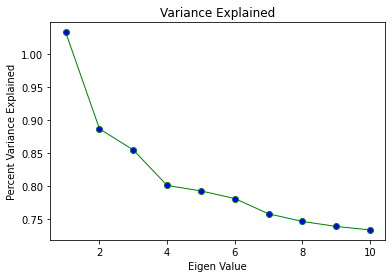

In [6]:
# Displaying the variance explained versus PCA dimensions
e_val = KPCA(15)
var_exp = []
tot_var = np.sum(e_val)
for i in range(10):
    var_exp.append(100*e_val[i]/tot_var)
idx = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(idx, var_exp, color='green', linestyle='solid', linewidth=1, marker='o', markerfacecolor='blue', markersize=6)
plt.xlabel('Eigen Value')
plt.ylabel('Percent Variance Explained')
plt.title('Variance Explained')